# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**Note**: This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Overview of Dandiset 001354

This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

**Dandiset URL**: https://dandiarchive.org/dandiset/001354/0.250312.0036

## Notebook Summary

This notebook will demonstrate how to:
1. Load the Dandiset using the DANDI API.
2. Access basic metadata about the Dandiset.
3. Load and explore data from a selected NWB file within the Dandiset.
4. Visualize electrophysiological response and stimulus data.

## Required Packages

To run this notebook, you will need the following Python packages:

- dandi
- pynwb
- h5py
- remfile
- jupyter
- matplotlib
- numpy
- seaborn

These packages are assumed to be already installed on your system.

In [1]:
# uncomment the following line if you need to install the packages
%pip install dandi pynwb h5py remfile jupyter matplotlib numpy seaborn

Note: you may need to restart the kernel to use updated packages.


## Loading the Dandiset

We will use the `dandi` library to connect to the DANDI archive and access the specified Dandiset.

In [2]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036

First 5 assets:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97)


## Loading and Exploring an NWB File

We will now load one of the NWB files from the Dandiset to explore its contents. We will use the file located at `sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`.

In [3]:
import pynwb
import h5py
import remfile

# Specify the URL of the NWB asset
nwb_asset_url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"

# Load the NWB file using remfile and h5py
remote_file = remfile.File(nwb_asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file identifier: pk2024_07_17_0001
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00
Subject ID: PK-109
Subject species: Mus musculus
Subject sex: F


### Neurosift Link for the Selected NWB File

You can explore this NWB file interactively on Neurosift using the following link:

https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036

### Summary of NWB File Contents

This NWB file primarily contains intracellular electrophysiology data. The main data streams are located within the `acquisition` and `stimulus` groups, specifically as `CurrentClampSeries`.

The structure includes:

- **General Metadata**: Information about the session, subject, and device.
- **Intracellular Electrodes**: Defines the electrodes used for recording.
- **Acquisition**: Contains the recorded physiological data.
  - `CurrentClampSeries`: Time series data representing the voltage or current recordings.
- **Stimulus**: Contains the applied stimulus data.
  - `CurrentClampStimulusSeries`: Time series data representing the applied current or voltage stimulus.

The `nwb-file-info` tool output indicates numerous `CurrentClampResponse` and `CurrentClampStimulus` series objects, such as `current_clamp-response-01-ch-0`, `stimulus-01-ch-0`, and so on, suggesting multiple trials and possibly channels were recorded.

## Visualizing Data from the NWB File

Let's visualize some of the recorded response and applied stimulus data. We will plot the first `CurrentClampSeries` response and stimulus.

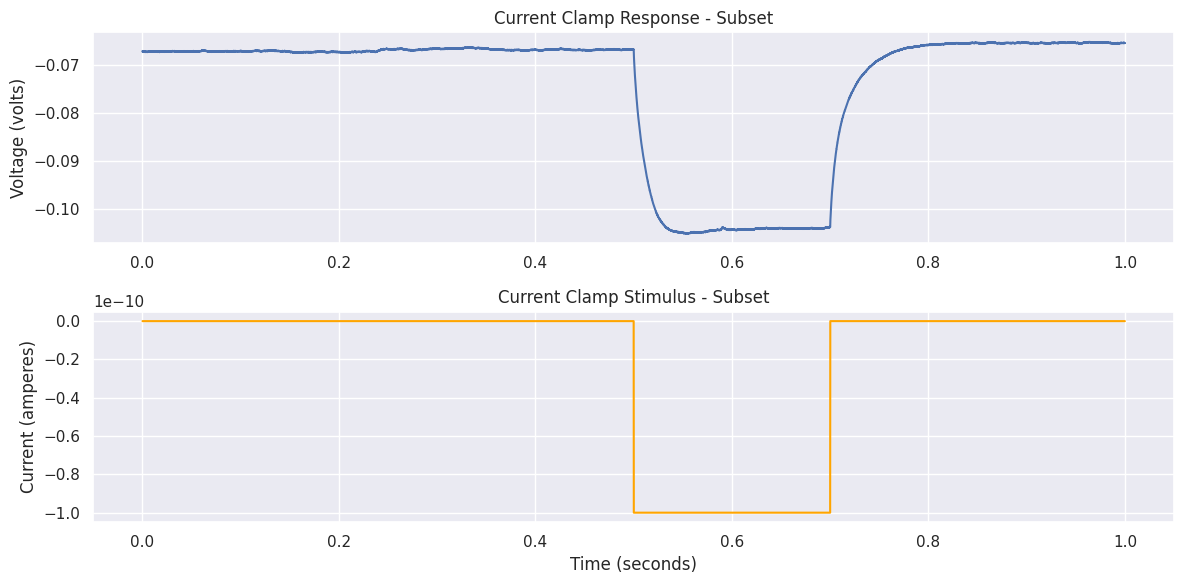

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set seaborn theme for better aesthetics
sns.set_theme()

# Get the response and stimulus series
response_series = nwb.acquisition["current_clamp-response-01-ch-0"]
stimulus_series = nwb.stimulus["stimulus-01-ch-0"]

# Load a subset of the data to avoid excessive memory usage
# Let's load the first 20000 data points (1 second at 20kHz)
num_points = 20000
response_data_subset = response_series.data[0:num_points].astype(np.float64) * response_series.conversion
stimulus_data_subset = stimulus_series.data[0:num_points].astype(np.float64) * stimulus_series.conversion

# Create a time vector
sampling_rate = response_series.rate
starting_time = response_series.starting_time
time_vector_subset = starting_time + np.arange(num_points) / sampling_rate

# Plot the response and stimulus
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_vector_subset, response_data_subset)
plt.ylabel(f"Voltage ({response_series.unit})")
plt.title("Current Clamp Response - Subset")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_vector_subset, stimulus_data_subset, color='orange')
plt.xlabel(f"Time ({response_series.starting_time_unit})")
plt.ylabel(f"Current ({stimulus_series.unit})")
plt.title("Current Clamp Stimulus - Subset")
plt.grid(True)

plt.tight_layout()
plt.show()

The plots above show a subset of the recorded voltage response and the applied current stimulus for the first trial and channel. This demonstrates
how to access and plot time series data from the NWB file.

Let's visualize another response and stimulus pair. We will select `current_clamp-response-10-ch-0` and `stimulus-10-ch-0`.

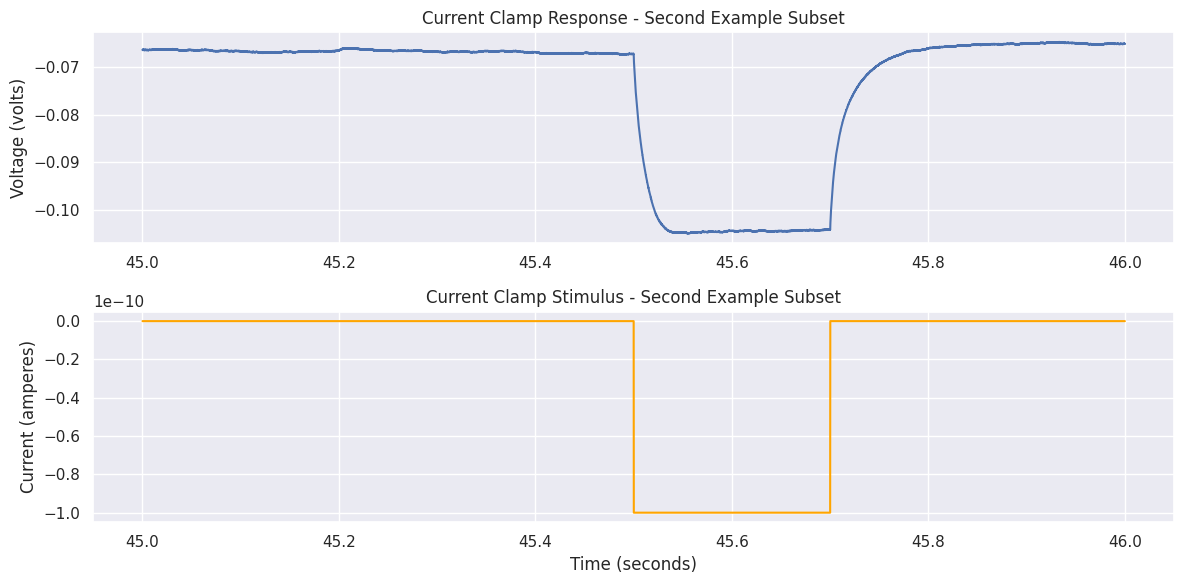

In [5]:
# Get another response and stimulus series
response_series_2 = nwb.acquisition["current_clamp-response-10-ch-0"]
stimulus_series_2 = nwb.stimulus["stimulus-10-ch-0"]

# Load a subset of the data
num_points_2 = 20000
response_data_subset_2 = response_series_2.data[0:num_points_2].astype(np.float64) * response_series_2.conversion
stimulus_data_subset_2 = stimulus_series_2.data[0:num_points_2].astype(np.float64) * stimulus_series_2.conversion

# Create a time vector for this series
sampling_rate_2 = response_series_2.rate
starting_time_2 = response_series_2.starting_time
time_vector_subset_2 = starting_time_2 + np.arange(num_points_2) / sampling_rate_2

# Plot the second response and stimulus
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_vector_subset_2, response_data_subset_2)
plt.ylabel(f"Voltage ({response_series_2.unit})")
plt.title("Current Clamp Response - Second Example Subset")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_vector_subset_2, stimulus_data_subset_2, color='orange')
plt.xlabel(f"Time ({response_series_2.starting_time_unit})")
plt.ylabel(f"Current ({stimulus_series_2.unit})")
plt.title("Current Clamp Stimulus - Second Example Subset")
plt.grid(True)

plt.tight_layout()
plt.show()

This second example shows another instance of recorded response and stimulus data, highlighting that there are multiple such series within this NWB file.

## Summary and Future Directions

This notebook provided a basic introduction to accessing and exploring data from Dandiset 001354 using the DANDI API and PyNWB. We demonstrated how to load Dandiset metadata, list assets, load a specific NWB file, and visualize subsets of the intracellular electrophysiology response and stimulus data.

Possible future directions for analysis include:
- Exploring other NWB files within the Dandiset.
- Analyzing the full duration of the time series data.
- Identifying and analyzing action potentials in the response data.
- Comparing responses to different stimulus types or across different cells/slices.
- Integrating other metadata from the NWB file into the analysis (e.g., information about the cell or slice).

Remember to refer to the NWB specification and the output of `nwb-file-info` for a detailed understanding of the NWB file structure and available data.